## <p style="text-align: center; font-weight: bold">Projet Stastitiques 📈</p>

### <p style="text-align: center">Equipe : CHU Thanh-Thao, NDIAYE Haby, PASSERINI Pierre, NEGHAD Lydia</p>


#### 🔗 Lien des données : 

https://explore.data.gouv.fr/fr/datasets/586dae65a3a7290df6f4be90/?Code%20de%20la%20discipline__exact=disc06&Ann%C3%A9e__exact=2020#/resources/c7c9642b-9fa1-40a0-83d5-1615c15b4178

#### <p style="font-weight: bold">🛠️ Importations</p>

In [107]:
import plotly.express as px
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas
from pandas import DataFrame
import statsmodels.api as sm
from IPython.display import display

#### <p style="font-weight: bold">🔃 Chargement des données</p>

In [108]:
def load_data(path: str="fr-esr-insertion_professionnelle-master_donnees_nationales.csv") -> DataFrame:
    return pandas.read_csv(path, delimiter=";")
df = load_data()
df.columns
df_base=df #garder une copie de la base

## **1️⃣ Gestion des valeurs manquantes et nettoyage des données**

#### **<p style="font-weight: bold; color: #3c9cd6;">◻️ Visualisation de la répartition des valeurs et des données manquantes pour le Taux d’insertion<p>** 

Text(0, 0.5, 'Pourcentage (%)')

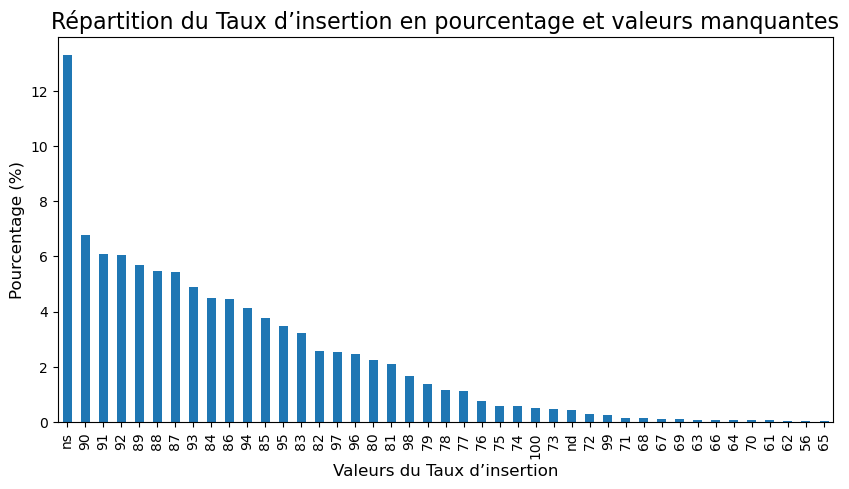

In [109]:
missing_pct = (df["Taux d’insertion"].value_counts() / len(df)) * 100
plt.figure(figsize = (10, 5))
missing_pct.plot(kind='bar')
plt.title("Répartition du Taux d’insertion en pourcentage et valeurs manquantes", fontsize=16)
plt.xlabel("Valeurs du Taux d’insertion", fontsize=12)
plt.ylabel("Pourcentage (%)", fontsize=12)

#### Les "ns" (non signalés) représentent 13 % des données, indiquant une proportion significative de valeurs manquantes qui pourrait biaiser l'analyse.

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ Nettoyage de la colonne "Taux d'insertion<p>

In [110]:
df["Taux d'insertion"] = df["Taux d’insertion"].astype(str)  # Convertion 'Taux d’insertion' en chaine de caractères

df = df[~df["Taux d'insertion"].isin(['ns', 'nd'])]   # Convertir la colonne 'Taux d'insertion' en numérique

df["Taux d'insertion"] = pd.to_numeric(df["Taux d'insertion"], errors='coerce')

df = df.dropna(subset=['Taux d’insertion'])


print(df["Taux d'insertion"].describe()) # Description du DataFrame DataFrame


count    2805.000000
mean       88.002496
std         6.082674
min        56.000000
25%        84.000000
50%        89.000000
75%        92.000000
max       100.000000
Name: Taux d'insertion, dtype: float64


C:\Users\Wouaff\AppData\Local\Temp\ipykernel_10124\2135092219.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**🔎 Visualisation du nombre de Na dans le taux d'insertion**

In [111]:
df['Taux d’insertion'].isna

<bound method Series.isna of 0       87
1       84
6       89
8       90
9       90
        ..
3262    88
3263    77
3264    85
3265    83
3266    82
Name: Taux d’insertion, Length: 2805, dtype: object>

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Transformation des colonnes en numériques**<p>

In [112]:
cols_to_numeric =["Année","Prof. libérale, indépendant, chef d’entreprise", "Fonctionnaire",
       "CDI", "CDI de chantier ou CDI de mission",
       "Contrat spécifique au doctorat", "CDD", "Vacataire", "Intérimaire",
       "Intermittent du spectacle", "Contrat de professionnalisation",
       "Emplois aidés (Contrat Initiative Emploi…)",
       "Volontariat international", "Vous-même",
       "La fonction publique (d'etat, territoriale ou hospitalière)",
       "Une entreprise privée", "Une entreprise publique", "Une association",
       "Une personne exerçant une profession libérale ou un indépendant",
       "Organisation internationale ou une institution de l'Union européenne",
       "Société d'économie mixte", "Un particulier",
       "Agriculture, sylviculture et pêche",
       "Industries (manufacturières,  extractives et autres)", "Construction",
       "Activités immobilières",
       "Commerce, transports, héberg-ement et restauration",
       "Information et communication", "Activités financières et d’assurance",
       "Activités spécialisées, scientifiques et techniques",
       "Activités de services administratifs et de soutien", "Enseignement",
       "Administration publique (hors ens.)",
       "Santé humaine et action sociale",
       "Arts, spectacles et activités récréatives",
       "Autres activités de service", "Agriculteur",
       "Artisan, commerçant, chef d'entreprise", "Profession libérale",
       "Personnel de catégorie A de la fonction publique",
       "Ingénieur, cadre, prof. libérales, prof. intellectuelles sup",
       "Personnel de catégorie B de la fonction publique",
       "Emploi de niveau intermédiaire : technicien, agent de maîtrise…",
       "Personnel de catégorie C de la fonction publique", "Manœuvre, ouvrier",
       "Employé de bureau, de commerce, personnel de service", 'Nombre de réponses']
df[cols_to_numeric]=df[cols_to_numeric].apply(pd.to_numeric, errors = "coerce")


#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Création de variables numériques pour la segmentation des données**<p>

In [113]:
df["Situation_NUM"] =  df['situation'].apply(lambda x: 18 if x == '18 mois après le diplôme' else 30)
df["Diplome_NUM"] =  df['Diplôme'].apply(lambda x: 0 if x == 'MASTER LMD' else 1)
df["ALL_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'ALL' else 0)
df["DEG_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'DEG' else 0)
df["LLA_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'LLA' else 0)
df["MEEF_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'MEEF' else 0)
df["SHS_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'SHS' else 0)
df["STS_NUM"] =  df['Code du domaine'].apply(lambda x: 1 if x == 'STS' else 0)
df["Genre_NUM"] =  df['Genre'].apply(lambda x: 1 if x == 'hommes' else 0)

**La création de variables numériques dans la deuxième cellule a été nécessaire pour faciliter l'analyse des données : Les variables catégoriques initiales (par exemple, "hommes", "femmes", "ALL", "DEG", etc.) sont converties en valeurs numériques (0 ou 1), ce qui est plus pratique pour les calculs, les analyses statistiques ou l'utilisation dans des modèles de machine learning.**

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Séparation en 2 sous-tableaux: tous genres (femmes et hommes) et genres séparés**<p>

In [114]:
 # On garde "femmes et homme"

df_genres_mix = df[df["Genre"]=="femmes et hommes"]

# On garde "femmes" et "hommes" séparéments

df_genres_F_H = df[df["Genre"]!="femmes et hommes"] 

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Séparation des sous totaux avec les Masters Enseignement**<p>

In [115]:
FH_Ens_Diplome = df_genres_F_H[df_genres_F_H["Secteur disciplinaire"].str.startswith("Ensemble")|df_genres_F_H["Secteur disciplinaire"].str.startswith("Masters enseignement")]
FH_Sep_Diplome = df_genres_F_H[~df_genres_F_H["Secteur disciplinaire"].str.startswith("Ensemble")|df_genres_F_H["Secteur disciplinaire"].str.startswith("Masters enseignement")]

- **FH_Ens_Diplome : Rassemble les lignes correspondant uniquement à "Ensemble" ou "Masters enseignement".**
- **FH_Sep_Diplome : Exclut "Ensemble" tout en incluant "Masters enseignement".**

## **2️⃣ Matrice de corrélation des variables numériques**

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Heatmap des corrélations entre le Taux d’insertion et les variables associées**<p>

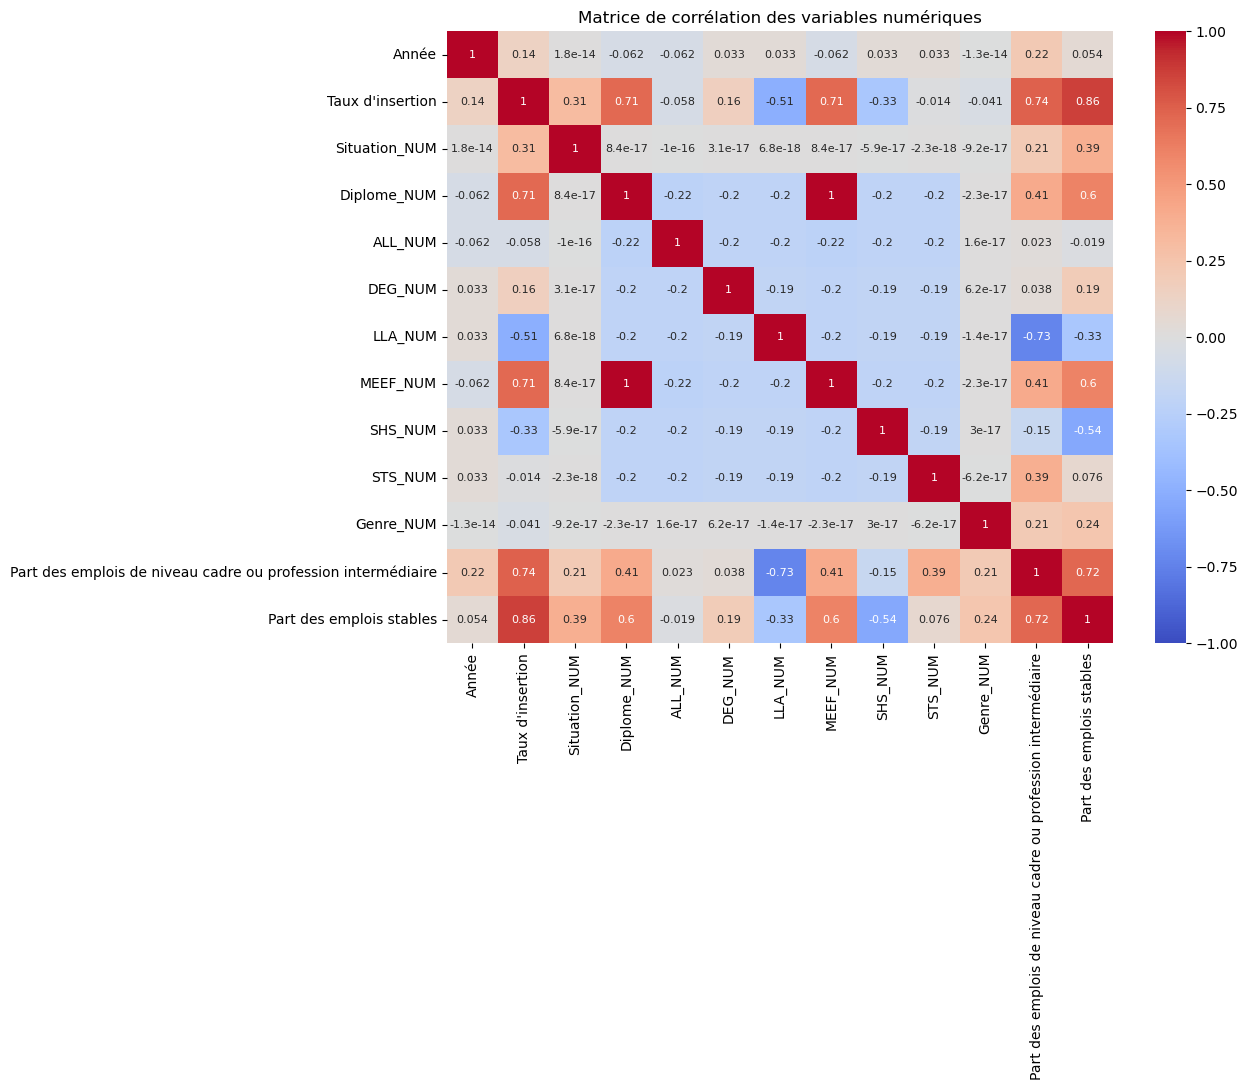

In [116]:
plt.figure(figsize=(13, 11))

FH_Ens_Diplome_corr_matrix = FH_Ens_Diplome[['Année',"Taux d'insertion", 'Situation_NUM', 'Diplome_NUM', 'ALL_NUM',
       'DEG_NUM', 'LLA_NUM', 'MEEF_NUM', 'SHS_NUM', 'STS_NUM', 'Genre_NUM','Part des emplois de niveau cadre ou profession intermédiaire',
             'Part des emplois stables', ]].corr()

sns.heatmap(FH_Ens_Diplome_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={"size": 8})
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

## **3️⃣ Régression Linéaire**

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Résultats de la régression linéaire OLS**<p>

In [117]:
X1 = FH_Ens_Diplome[['Année', 'Situation_NUM', 'Diplome_NUM', 
       'DEG_NUM', 'LLA_NUM', 'MEEF_NUM', 'SHS_NUM', 'STS_NUM', 'Genre_NUM',
       'Part des emplois de niveau cadre ou profession intermédiaire', 'Part des emplois stables']]
y = FH_Ens_Diplome['Taux d’insertion']
X1 = X1.apply(pd.to_numeric)
y = pd.to_numeric(FH_Ens_Diplome['Taux d’insertion'])

X= sm.add_constant(X1)
resultats = sm.OLS(y,X).fit()
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Taux d’insertion   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.33e-98
Time:                        18:43:53   Log-Likelihood:                -350.34
No. Observations:                 200   AIC:                             722.7
Df Residuals:                     189   BIC:                             759.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         -380.2163    105.540     -3.603      0.000    -588.404    -172.029
Année                                                            0.2217      0.053      4.156      0.000       0.116       0.327
Situation_NUM                                                    0.0759      0.026      2.895      0.004       0.024       0.128
Diplome_NUM                                                      2.2014      0.266      8.287      0.000       1.677       2.725
DEG_NUM                                                          1.1763      0.389      3.027      0.003       0.410       1.943
LLA_NUM                                                         -2.2923      0.648     -3.540      0.001      -3.570      -1.015
MEEF_NUM                                                         2.2014      0.266      8.287      0.000       1.677       2.725
SHS_NUM                                                         -0.0581      0.523     -0.111      0.912      -1.090       0.974
STS_NUM                                                         -0.7849      0.433     -1.813      0.071      -1.639       0.069
Genre_NUM                                                       -1.8482      0.256     -7.229      0.000      -2.352      -1.344
Part des emplois de niveau cadre ou profession intermédiaire     0.0962      0.049      1.959      0.052      -0.001       0.193
Part des emplois stables                                         0.1914      0.029      6.494      0.000       0.133       0.250
==============================================================================
Omnibus:                        2.934   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.747
Skew:                          -0.287   Prob(JB):                        0.253
Kurtosis:                       3.027   Cond. No.                     1.67e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### ➡️ R-squared:	0.921

#### Explication : 

➡️ Lors de l'analyse des résultats de la régression, nous avons constaté que **SHS_NUM** (p-value = 0.912), **STS_NUM** (p-value = 0.071) et **Part des emplois de niveau cadre ou profession intermédiaire** (p-value = 0.052) n'étaient pas statistiquement significatives (p-value > 0.05). Nous avons donc décidé de les retirer pour simplifier le modèle et nous concentrer sur les variables ayant un réel impact sur le Taux d'insertion, afin d'améliorer la clarté et l'efficacité de l'analyse.

#### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Résultats de la régression linéaire OLS sans les 3 colonnes (SHS,STS et Part des emplois de niveau cadre ou profession intermédiaire**<p>

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


X = FH_Ens_Diplome[['Année', 'Situation_NUM', 'Diplome_NUM',      # Define features (X) and target (y)
       'DEG_NUM', 'LLA_NUM', 'MEEF_NUM', 'Genre_NUM', 'Part des emplois stables']]
y = FH_Ens_Diplome['Taux d’insertion']


model = LinearRegression()     # Train the model using the entire dataset
model.fit(X, y)


y_pred = model.predict(X)   # Predict using the same dataset


r2 = r2_score(y, y_pred)  # Evaluate the model
mse = mean_squared_error(y, y_pred)

print(f"R²: {r2}")
print(f"Mean Squared Error: {mse}")



R²: 0.9192884800888643
Mean Squared Error: 1.9939276547046643


### ➡️ R-squared:	0.919

### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Visualisation de la regression linéaire**<p>

In [119]:
y = pd.to_numeric(y, errors='coerce') #y_test = pd.to_numeric(y_test, errors='coerce')
 
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  # Create a DataFrame with actual and predicted values 

# Plot using Plotly 
fig = px.scatter(results, x='Actual', y='Predicted', title='Actual vs Predicted Taux d’insertion', labels={'Actual': 'Actual', 'Predicted': 'Predicted'}) 
fig.add_trace(px.line(results, x='Actual', y='Actual', labels={'Actual': 'Actual'}).data[0]) 
fig.show()

⏩ Le graphique **"Actual vs Predicted Taux d’insertion"** compare les valeurs réelles du Taux d'insertion avec les prédictions du modèle. On observe une forte correspondance, les points étant majoritairement alignés le long de la ligne diagonale, indiquant des prédictions précises.

Cependant, quelques écarts sont visibles, notamment pour des valeurs réelles proches de 80 ou 100, où certaines prédictions s'éloignent de la ligne. Cela suggère que le modèle a plus de mal à prédire aux extrêmes du Taux d'insertion. Globalement, la performance reste satisfaisante avec des prédictions proches des valeurs réelles dans la majorité des cas.

## **4️⃣ Analyse complémentaire**

### <p style="font-weight: bold; color: #3c9cd6;">◻️ **GLM appliqué au taux d'insertion : Étude et interprétation des résidus**<p>


GLM :
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Taux d’insertion   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                          3.5315
Method:                          IRLS   Log-Likelihood:                -406.91
Date:                Sun, 12 Jan 2025   Deviance:                       685.11
Time:                        18:43:53   Pearson chi2:                     685.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9976
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const            

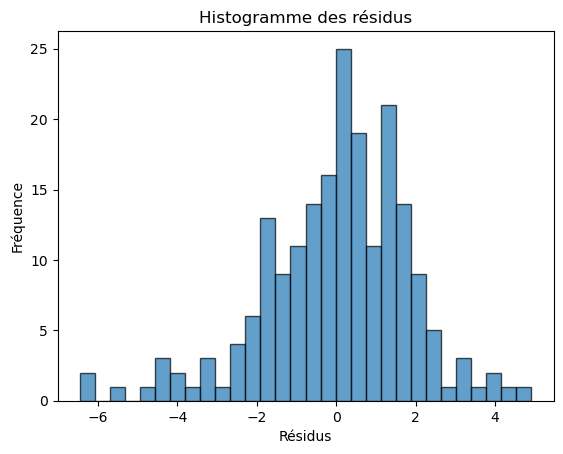

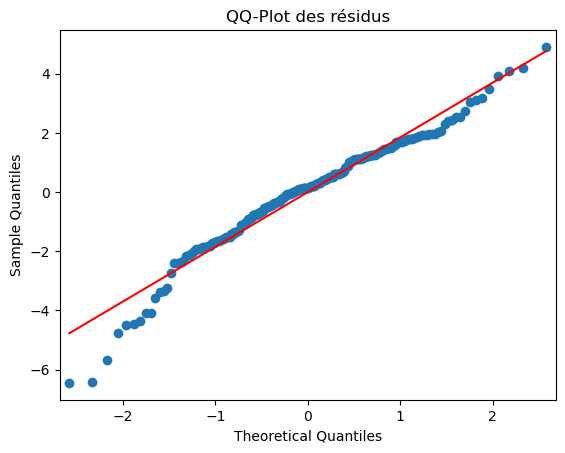

In [120]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


variables_finales = [
    'Année', 'Situation_NUM', 'Diplome_NUM', 'Genre_NUM',       # Variables explicatives et cible
    'Part des emplois stables'
]


X_final = FH_Ens_Diplome[variables_finales].apply(pd.to_numeric, errors='coerce')  # Si les colonnes utilisées dans X_final sont numériques ou non
X_final = sm.add_constant(X_final)  # Ajout de la constante
y = pd.to_numeric(FH_Ens_Diplome['Taux d’insertion'], errors='coerce')


if X_final.isna().any().any():
    print("Attention : NaN détecté dans X_final.")
if np.any(np.isinf(X_final.values)):
    print("Attention : Valeurs infinies détectées dans X_final.")  # Vérification des valeurs NaN ou infinies
if y.isna().any():
    print("Attention : NaN détecté dans y.")
if np.any(np.isinf(y.values)):
    print("Attention : Valeurs infinies détectées dans y.")

#--------------------- Étape 1 : Construction et ajustement du modèle GLM -------------------#

print("\nGLM :")
try:
    
    glm_model = sm.GLM(y, X_final, family=sm.families.Gaussian())   # Modèle GLM avec une fonction de lien gaussienne (linéaire)
    glm_results = glm_model.fit() 

   
    print(glm_results.summary())   # Résumé des résultats

except Exception as e:
    print(f"Erreur lors de l'ajustement du modèle GLM : {e}")

#------------------------------ Étape 2 : Analyse des résidus---------------------------#

try:
    residuals = glm_results.resid_response
    print("\nDistribution des résidus :")
    print(residuals.describe())

   
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)      # Histogramme des résidus
    plt.title("Histogramme des résidus")
    plt.xlabel("Résidus")
    plt.ylabel("Fréquence")
    plt.show()

  
    sm.qqplot(residuals, line='s')
    plt.title("QQ-Plot des résidus")    # QQ-Plot des résidus
    plt.show()

except Exception as e:
    print(f"Erreur lors de l'analyse des résidus : {e}")

**Résumé 📄**

 **Points positifs ✔️ :**
- **Bon ajustement global** : Le modèle prédit sans biais systématique et respecte globalement les hypothèses grâce à des résidus symétriques et proches de la normale.
- **Explication pertinente** : Les variables comme la part des emplois stables et le type de diplôme contribuent de manière significative au taux d’insertion.
- **Interprétation claire** : Les coefficients indiquent un impact positif de la part des emplois stables et un impact négatif du Genre_NUM sur le taux d’insertion.

 **Points à améliorer ❌ :**
- **Résidus extrêmes** : Quelques valeurs mal expliquées suggèrent des variables manquantes ou des données atypiques.
- **Variables non significatives** : Certaines variables, comme Situation_NUM, n’ont pas d’impact significatif (p > 0.05).
- **Pseudo R² très élevé (0.9976)** : Risque potentiel de surajustement, ce qui pourrait limiter la généralisation du modèle.

 **Conclusion :**
Le modèle est **globalement positif**, expliquant bien les données et offrant des résultats interprétables. Cependant, il nécessite des ajustements pour mieux gérer les cas atypiques, réduire le risque de surajustement et vérifier la pertinence de toutes les variables.

### <p style="font-weight: bold; color: #3c9cd6;">◻️ **Training d'un modèle de machine learning afin d'optimiser le R²**<p>

**Ces deux blocs de code montrent l’entraînement d’un modèle de régression linéaire en utilisant scikit-learn pour prédire le taux d’insertion à partir de variables explicatives. Les différences entre les deux résidents dans la taille de la portion utilisée pour les tests et l'évaluation des performances via le coefficient de détermination 𝑅2.**

In [121]:
X = FH_Ens_Diplome[['Année', 'Situation_NUM', 'Diplome_NUM', 
       'DEG_NUM', 'LLA_NUM', 'MEEF_NUM', 'Genre_NUM', 'Part des emplois stables']]
y = FH_Ens_Diplome['Taux d’insertion']
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred)}")



R²: 0.9007184305668163


**➡️ Le premier bloc de code montre que le modèle de régression linéaire entraîne sur un ensemble d'entraînement de 67% et teste sur 33% des données, avec un  R² de **0.9007**, indiquant que le modèle explique bien 90% de la variance des données sur l'ensemble de test.**

In [122]:
X = FH_Ens_Diplome[['Année', 'Situation_NUM', 'Diplome_NUM', 
       'DEG_NUM', 'LLA_NUM', 'MEEF_NUM', 'Genre_NUM', 'Part des emplois stables']]
y = FH_Ens_Diplome['Taux d’insertion']
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred)}")



R²: 0.9018711144531858


**➡️ Le deuxième bloc de code, en utilisant une répartition de 80% des données pour l'entraînement et 20% pour le test, atteint un  R² légèrement supérieur de **0.9018**, montrant une performance quasi identique mais légèrement optimisée, confirmant une bonne capacité explicative du modèle.**

### <p style="font-weight: bold; color: #3c9cd6;">◻️ Comparaison entre les valeurs réelles et prédites du Taux d’insertion<p>

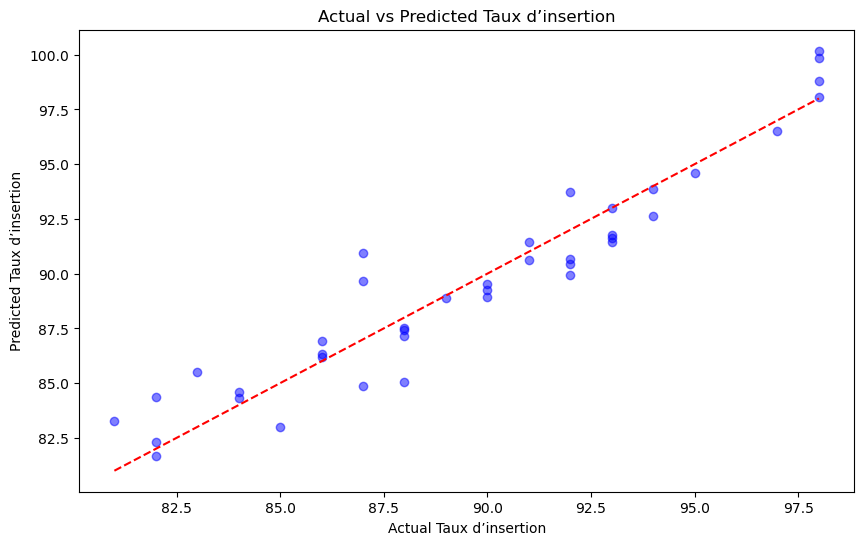

In [123]:
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

# Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')  # 1:1 line
plt.xlabel('Actual Taux d’insertion')
plt.ylabel('Predicted Taux d’insertion')
plt.title('Actual vs Predicted Taux d’insertion')
plt.show()

**Le graphique montre une bonne correspondance entre les taux d'insertion réels et prévus, avec la majorité des points proches de la ligne rouge. Cependant, quelques écarts signalent des cas où le modèle sous-estime ou surestime légèrement, indiquant un potentiel d'amélioration.**

### <p style="font-weight: bold; color: #3c9cd6;">◻️ Explication regression ML<p>

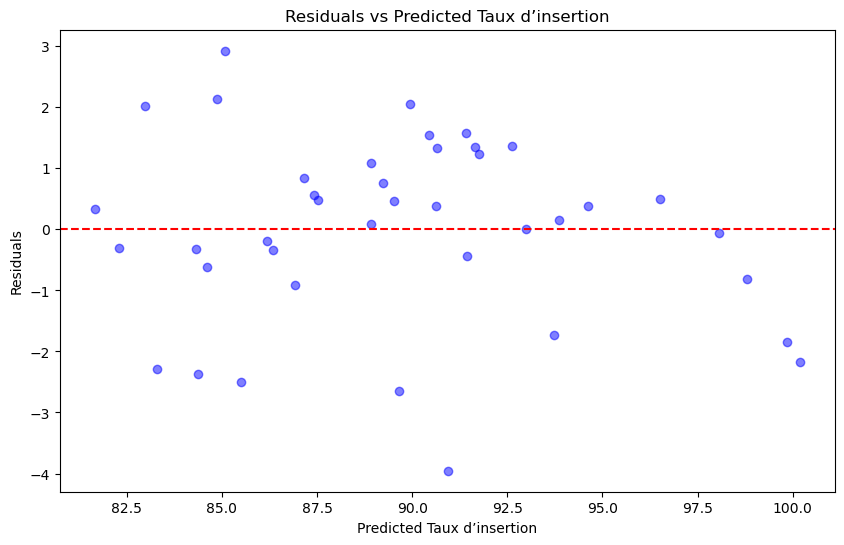

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Taux d’insertion')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Taux d’insertion')
plt.show()

**Le graphique "Résidus vs Predicted Taux d'insertion" montre que la majorité des résidus sont alignés autour de la ligne horizontale à zéro, indiquant que le modèle n'a pas de biais systématique. La dispersion des résidus est globalement homogène, ce qui suggère un bon ajustement du modèle. Cependant, quelques résidus extrêmes, qui s'éloignent de cette ligne, révèlent des observations moins bien expliquées, probablement dues à des facteurs non pris en compte ou à des valeurs atypiques. Cela indique une performance satisfaisante du modèle, tout en signalant des possibilités d'amélioration.**